# Final Project : Classification(Premium Default Prediction)

# PROBLEM DEFINITION

# HPOTHESIS GENERATION

# DATA EXTRACTION AND COLLECTION

# Importing Libraries

In [151]:
# importing libraries
# For mathematical calculations and array manipulation
import pandas as pd
import numpy as np                   

import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs
%matplotlib inline

import os
import warnings                   # To ignore any warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler, MinMaxScaler   #standard scaler

# Evaluation metrics
from sklearn.metrics import confusion_matrix  #evaluation metrics
from sklearn.metrics import classification_report

#MODEL BUILDING
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

#parameter improving
from sklearn.model_selection import GridSearchCV

# READING DATA

In [30]:
# loading the data
train = pd.read_csv('train credit.csv')
test = pd.read_csv('test credit.csv')
combine = [train, test]
#combine used to ensure changes done to complete dataset

Let's check the features present in our data and then we will look at their data types.

In [31]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [32]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [33]:
train.shape, test.shape

((79853, 12), (34224, 11))

In [34]:
#printing first five rows of the dataset
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [35]:
train.tail()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,1
79852,71531,0.550,15709,280140,1.0,0.0,1.0,99.84,8,A,Urban,0


In [36]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [37]:
test.tail()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
34219,81988,0.227,20810,110240,0.0,0.0,0.0,97.52,9,A,Urban
34220,30326,0.157,19353,125090,0.0,0.0,0.0,99.62,7,A,Rural
34221,65749,0.325,18264,196570,0.0,0.0,0.0,98.58,14,B,Rural
34222,65686,0.983,16798,212150,1.0,0.0,1.0,98.88,10,A,Urban
34223,93826,0.005,24467,89190,1.0,0.0,0.0,98.00,11,A,Urban


# VARIABLE IDENTIFICATION

In [38]:
# Print data types for each variable
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [39]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

# We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

# UNIVARIATE ANALYSIS

In [40]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


93% of the people paid their premium.

In [41]:
test.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000
25%,28254.750000,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000
75%,85386.250000,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000


In [42]:
train.describe(percentiles = [.08, .07, .06])

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
6%,6934.240000,0.000000,10959.000000,5.795120e+04,0.000000,0.000000,0.000000,97.940000,4.000000,0.000000
7%,8075.280000,0.000000,11321.000000,6.012000e+04,0.000000,0.000000,0.000000,98.060000,5.000000,1.000000
8%,9184.320000,0.001000,11329.000000,6.380000e+04,0.000000,0.000000,0.000000,98.150000,5.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [43]:
test.describe(percentiles = [.08, .07, .06])

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000
6%,6613.900000,0.000000,10958.000000,5.839140e+04,0.000000,0.000000,0.000000,97.920000,4.000000
7%,7754.490000,0.001000,11320.000000,6.014000e+04,0.000000,0.000000,0.000000,98.030000,5.000000
8%,8990.840000,0.002000,11327.000000,6.458000e+04,0.000000,0.000000,0.000000,98.120000,5.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000


# BIVARIATE ANALYSIS

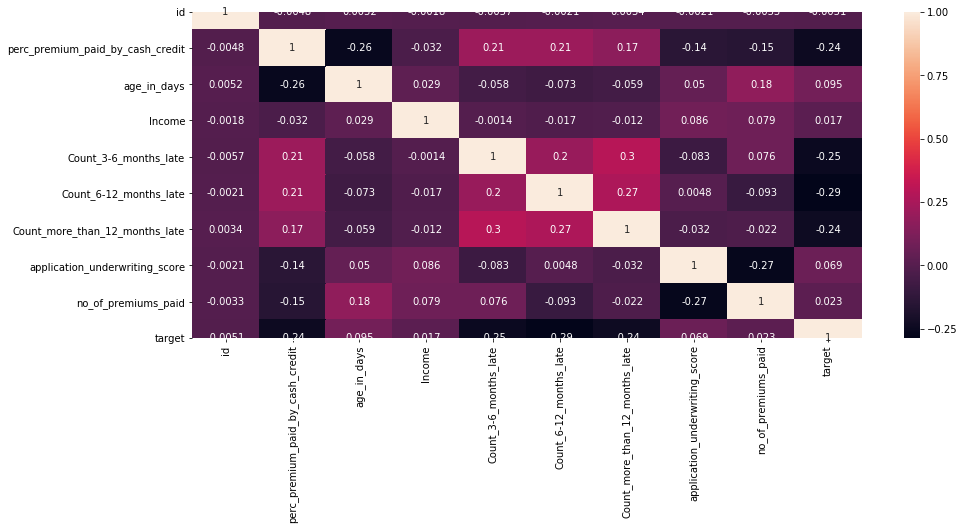

In [44]:
plt.figure(figsize = (15, 6))
sns.heatmap(train.corr(), annot = True)
plt.show()

# DATA EXPLORATION AND TRANSFORMATION

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
target                              79853 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 7.3+ MB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 11 columns):
id                                  34224 non-null int64
perc_premium_paid_by_cash_credit    34224 non-null float64
age_in_days                         34224 non-null int64
Income                              34224 non-null int64
Count_3-6_months_late               34193 non-null float64
Count_6-12_months_late              34193 non-null float64
Count_more_than_12_months_late      34193 non-null float64
application_underwriting_score      32901 non-null float64
no_of_premiums_paid                 34224 non-null int64
sourcing_channel                    34224 non-null object
residence_area_type                 34224 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 2.9+ MB


In [47]:
train.isnull()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
79848,False,False,False,False,False,False,False,False,False,False,False,False
79849,False,False,False,False,False,False,False,False,False,False,False,False
79850,False,False,False,False,False,False,False,False,False,False,False,False
79851,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
test.isnull()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
34219,False,False,False,False,False,False,False,False,False,False,False
34220,False,False,False,False,False,False,False,False,False,False,False
34221,False,False,False,False,False,False,False,False,False,False,False
34222,False,False,False,False,False,False,False,False,False,False,False


In [49]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [50]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [51]:
# CONVERTING AGE IN DAYS TO YEARS AND DROPPING PREVIOUS ONE 
for dataset in combine: 
    dataset['age'] = dataset['age_in_days']//365
    dataset.drop(['age_in_days'], axis = 1, inplace = True)
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,86


In [52]:
#GROUPING SOURCING CHANNEL
train[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


We might need to make income groups to understand the relations better

In [53]:
#BINNING INCOME OF THE TRAIN DATASET AND GRPUPING ON THE BASIS OF TARGET
train['Incomeclass'] = pd.cut(train['Income'], 5)
train[['Incomeclass', 'target']].groupby('Incomeclass', as_index = False).count()

,Incomeclass,target
0,"(-66208.57, 18071744.0]",79846
1,"(18071744.0, 36119458.0]",4
2,"(36119458.0, 54167172.0]",2
3,"(54167172.0, 72214886.0]",0
4,"(72214886.0, 90262600.0]",1


In [54]:
#Let's standardize our data by using a standard scaler
scaler = MinMaxScaler()
scaler = scaler.fit(train[['Income']])
xscale = scaler.transform(train[['Income']])
xscale

array([[0.00366839],
       [0.00322611],
       [0.00066612],
       ...,
       [0.00311386],
       [0.00016955],
       [0.00283814]])

In [55]:
#scaler.mean
print(scaler.scale_)

[1.10817359e-08]


In [56]:
#ADDING SCALED INCOME
train['scale_income'] = xscale
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Incomeclass,scale_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,33,"(-66208.57, 18071744.0]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,59,"(-66208.57, 18071744.0]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,48,"(-66208.57, 18071744.0]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,42,"(-66208.57, 18071744.0]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,86,"(-66208.57, 18071744.0]",0.001935


In [57]:
#BINNING INCOMECLASS AS WELL OF THE TRAIN DATASET AND GRPUPING ON THE BASIS OF TARGET
train['Incomeclass'] = pd.cut(train['scale_income'], 5)
train[['Incomeclass', 'target']].groupby('Incomeclass', as_index = False).count()

,Incomeclass,target
0,"(-0.001, 0.2]",79846
1,"(0.2, 0.4]",4
2,"(0.4, 0.6]",2
3,"(0.6, 0.8]",0
4,"(0.8, 1.0]",1


# Outlier Treatment For Income

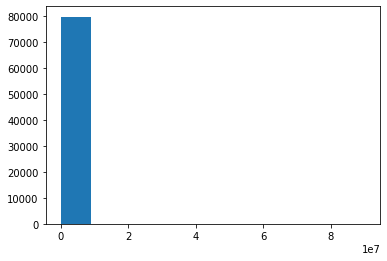

In [58]:
plt.hist(train['Income'])
plt.show()

In [59]:
upper_bound = 0.95
lower_bound = 0.1
result = train['Income'].quantile([lower_bound, upper_bound])
print(result)

0.10     71200.0
0.95    450050.0
Name: Income, dtype: float64


So, we can collect all the values in this range and let go of the other ones.

In [60]:
true_index = (train['Income'] < result.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: Income, Length: 79853, dtype: bool

In [61]:
false_index = ~true_index

In [62]:
no_outlier_train = train[true_index].copy()
no_outlier_train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Incomeclass,scale_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,86,"(-0.001, 0.2]",0.001935


In [63]:
no_outlier_train.describe()
#removed some outliers from every features availaible

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,age,scale_income
count,75846.000000,75846.000000,75846.000000,75750.000000,75750.000000,75750.000000,72972.000000,75846.000000,75846.000000,75846.000000,75846.000000
mean,57143.950980,0.316423,177177.155552,0.248449,0.080528,0.061215,99.053302,10.715502,0.936516,51.459563,0.001697
std,32928.877051,0.336727,92917.340492,0.691014,0.443761,0.314391,0.750534,5.073467,0.243833,14.417318,0.001030
min,2.000000,0.000000,24030.000000,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000,21.000000,0.000000
25%,28632.750000,0.033000,105090.000000,0.000000,0.000000,0.000000,98.800000,7.000000,1.000000,41.000000,0.000898
50%,57199.500000,0.168000,160555.000000,0.000000,0.000000,0.000000,99.200000,10.000000,1.000000,51.000000,0.001513
75%,85616.750000,0.544000,237560.000000,0.000000,0.000000,0.000000,99.530000,13.000000,1.000000,62.000000,0.002366
max,114076.000000,1.000000,450040.000000,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000,103.000000,0.004721


In [64]:
#Let's make groups for the new income range

In [65]:
#BINNING INCOMECLASS AS WELL OF THE TRAIN DATASET AND GRPUPING ON THE BASIS OF TARGET
no_outlier_train['Incomeclass'] = pd.cut(no_outlier_train['Income'], 5)
no_outlier_train[['Incomeclass', 'target']].groupby('Incomeclass', as_index = False).count()

,Incomeclass,target
0,"(23603.99, 109232.0]",20493
1,"(109232.0, 194434.0]",26922
2,"(194434.0, 279636.0]",16575
3,"(279636.0, 364838.0]",8587
4,"(364838.0, 450040.0]",3269


In [66]:
#dividing income into a proper classes
combine = [train, test]
for dataset in combine: 
    dataset.loc[ dataset['Income'] <= 23603.99, 'Income'] = 0
    dataset.loc[(dataset['Income'] > 23603.99) & (dataset['Income'] <= 109232.0), 'Income'] = 1
    dataset.loc[(dataset['Income'] > 109232.0) & (dataset['Income'] <= 194434.0), 'Income'] = 2
    dataset.loc[(dataset['Income'] > 194434.0) & (dataset['Income'] <= 279636.0), 'Income'] = 3
    dataset.loc[(dataset['Income'] > 279636.0) & (dataset['Income'] <= 364838.0), 'Income'] = 4
    dataset.loc[(dataset['Income'] > 364838.0) & (dataset['Income'] <= 450040.0), 'Income'] = 5
    dataset.loc[ dataset['Income'] > 450040.0, 'Income'] = 6
    
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Incomeclass,scale_income
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,86,"(-0.001, 0.2]",0.001935


In [67]:
train.loc[false_index, 'Income'] = 5
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Incomeclass,scale_income
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,86,"(-0.001, 0.2]",0.001935


In [68]:
train.drop(['Incomeclass', 'scale_income'], axis = 1, inplace = True)
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,33
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,59
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,48
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,42
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,86


making classes for Age

In [69]:
train['Ageclass'] = pd.cut(train['age'], 5)
train[['Ageclass', 'target']].groupby('Ageclass', as_index = False).count()

,Ageclass,target
0,"(20.918, 37.4]",14314
1,"(37.4, 53.8]",30585
2,"(53.8, 70.2]",26773
3,"(70.2, 86.6]",7531
4,"(86.6, 103.0]",650


The Age feature lies between 20 to 103.

In [70]:
#assigning numbers to the ageclass
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 37.4, 'age'] = 0
    dataset.loc[(dataset['age'] > 37.4) & (dataset['age'] <= 53.8), 'age'] = 1
    dataset.loc[(dataset['age'] > 53.8) & (dataset['age'] <= 70.2), 'age'] = 2
    dataset.loc[(dataset['age'] > 70.2) & (dataset['age'] <= 86.6), 'age'] = 3
    dataset.loc[ dataset['age'] > 86.6, 'age'] = 4
combine = [train, test]
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Ageclass
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(20.918, 37.4]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(53.8, 70.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(37.4, 53.8]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(37.4, 53.8]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(70.2, 86.6]"


In [71]:
train.drop('Ageclass', axis = 1, inplace = True)

In [72]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3


In [73]:
#grouping of mean und_score based on the ageclass
train[['age', 'application_underwriting_score']].groupby('age').mean()

,application_underwriting_score
age,
0,99.145848
1,98.978552
2,99.057655
3,99.300457
4,99.537480


In [74]:
#binning the number of premium paid
train['Premiumclass'] = pd.cut(train['no_of_premiums_paid'], 5)

In [75]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]"


In [76]:
#grouping premiums based on the application_underwriting _scores
train[['Premiumclass', 'application_underwriting_score']].groupby('Premiumclass').count()

,application_underwriting_score
Premiumclass,
"(1.942, 13.6]",56830
"(13.6, 25.2]",18944
"(25.2, 36.8]",1023
"(36.8, 48.4]",62
"(48.4, 60.0]",20


In [77]:
print(train['application_underwriting_score'].mean())
print(train['application_underwriting_score'].std())

99.06729119785102
0.7397990154151102


In [78]:
print(train[train['sourcing_channel'] == 'A']['application_underwriting_score'].std())

0.7695318642626707


In [79]:
#grouping the sourcing channel
train[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


In [80]:
print(train[train['sourcing_channel'] == 'C']['application_underwriting_score'].std())

0.7430664037803405


In [81]:
train[['sourcing_channel', 'application_underwriting_score']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,application_underwriting_score
0,A,99.102432
1,B,99.055857
2,C,98.979512
3,D,99.038356
4,E,99.067980


In [82]:
train[['residence_area_type', 'application_underwriting_score']].groupby('residence_area_type', as_index = False).mean()

,residence_area_type,application_underwriting_score
0,Rural,99.062726
1,Urban,99.070299


setting the value of underwriting score based on the sourcing channel. 

In [83]:
train.dtypes

id                                     int64
perc_premium_paid_by_cash_credit     float64
Income                                 int64
Count_3-6_months_late                float64
Count_6-12_months_late               float64
Count_more_than_12_months_late       float64
application_underwriting_score       float64
no_of_premiums_paid                    int64
sourcing_channel                      object
residence_area_type                   object
target                                 int64
age                                    int64
Premiumclass                        category
dtype: object

In [84]:
combine = [train, test]
for dataset in combine: 
    mask1 = dataset['application_underwriting_score'].isnull()
    for source in ['A', 'B', 'C', 'D', 'E']:
        mask2 = (dataset['sourcing_channel'] == source)
        source_mean = dataset[dataset['sourcing_channel'] == source]['application_underwriting_score'].mean()
        dataset.loc[mask1 & mask2, 'application_underwriting_score'] = source_mean

In [85]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]"


In [86]:
train.isnull().sum()

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               97
Count_6-12_months_late              97
Count_more_than_12_months_late      97
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
target                               0
age                                  0
Premiumclass                         0
dtype: int64

In [87]:
test.isnull().sum()

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
age                                  0
dtype: int64

In [88]:
test[test['Count_3-6_months_late'].isnull()]

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
661,27504,1.0,1,NaN,NaN,NaN,98.969145,2,C,Urban,0
693,105597,1.0,1,NaN,NaN,NaN,98.969145,2,C,Rural,1
1994,11064,1.0,1,NaN,NaN,NaN,99.043758,2,B,Rural,0
2041,71932,1.0,1,NaN,NaN,NaN,99.104517,2,A,Urban,0
2182,61662,1.0,1,NaN,NaN,NaN,99.104517,2,A,Rural,0
3162,87207,1.0,2,NaN,NaN,NaN,99.890000,2,A,Rural,3
4235,63318,1.0,1,NaN,NaN,NaN,99.104517,2,A,Rural,0
4591,107792,1.0,1,NaN,NaN,NaN,99.104517,2,A,Urban,0
6699,896,1.0,1,NaN,NaN,NaN,99.043758,2,B,Rural,0
8104,60408,1.0,1,NaN,NaN,NaN,99.011623,2,D,Urban,0


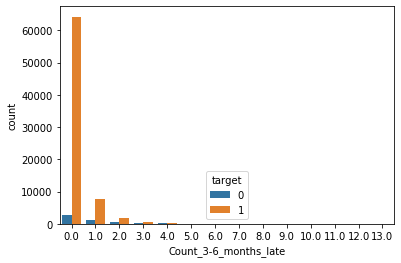

In [89]:
#visualizing late premiums to treat missing value and outliers
sns.countplot(x = 'Count_3-6_months_late', data = train, hue = 'target')

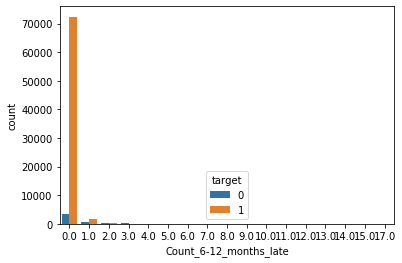

In [90]:
sns.countplot(x = 'Count_6-12_months_late', data = train, hue = 'target')

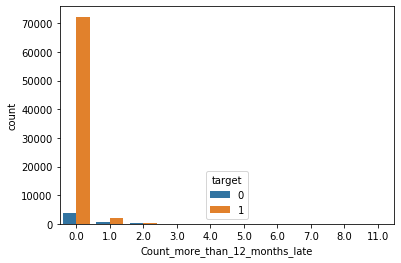

In [91]:
sns.countplot(x = 'Count_more_than_12_months_late', data = train, hue = 'target')

In [92]:
#intoducing late_premium for all the late premiums
combine = [train, test]
for dataset in combine: 
    dataset['late_premium'] = 0.0


In [93]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]",0.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]",0.0


In [94]:
#finding late premiums and adding]
combine = [train, test]
for dataset in combine:
        dataset.loc[(dataset['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
        dataset.loc[(dataset['Count_3-6_months_late'].notnull()), 'late_premium'] = dataset['Count_3-6_months_late'] + dataset['Count_6-12_months_late'] + dataset['Count_more_than_12_months_late']
        

In [95]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]",0.0


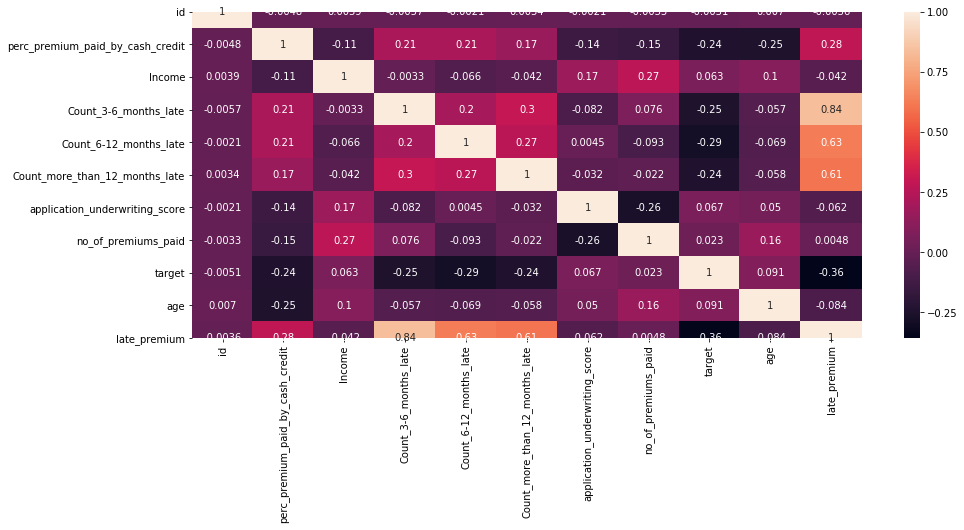

In [96]:
#correlation between every feature of train
plt.figure(figsize = (15, 6))
sns.heatmap(train.corr(), annot = True)

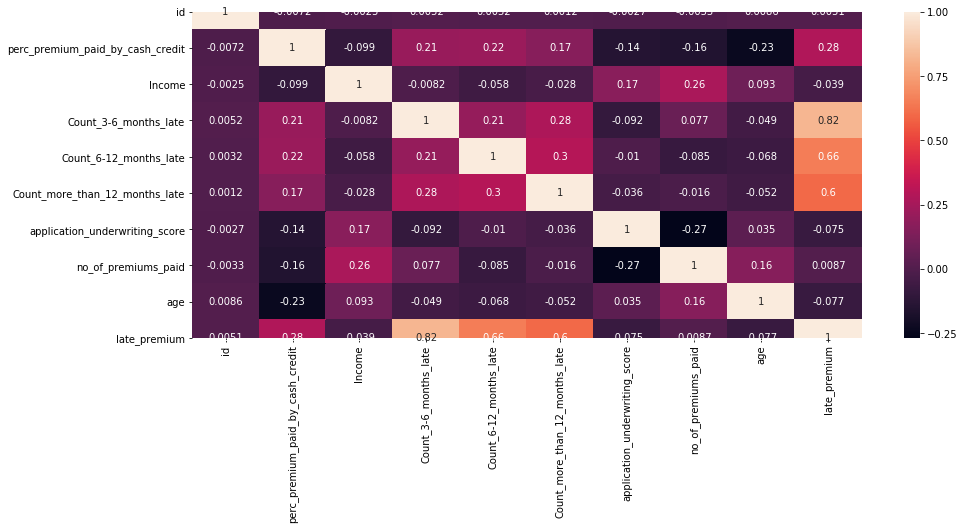

In [97]:
#correlation between every feature of test
plt.figure(figsize = (15, 6))
sns.heatmap(test.corr(), annot = True)

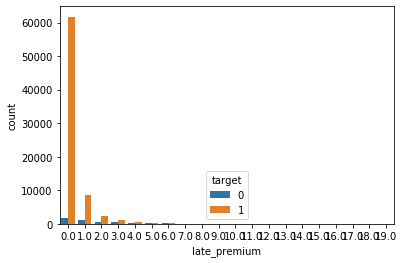

In [98]:
sns.countplot(x = 'late_premium', data = train, hue = 'target')

In [99]:
#assuming that max late premiums are 7 and min is 2 

In [100]:
train[['late_premium', 'target']].groupby('late_premium').mean()

,target
late_premium,
0.0,0.971659
1.0,0.890487
2.0,0.780694
3.0,0.695418
4.0,0.579800
5.0,0.510684
6.0,0.441696
7.0,0.487654
8.0,0.455556


In [101]:
#if late premium is null and target is 0 then loan not granted and max is 7
#if late premium is null and target is 1 then loan granted and min is 2
#if 
train.loc[(train['target'] == 0) & (train['late_premium'].isnull()),'late_premium'] = 7
train.loc[(train['target'] == 1) & (train['late_premium'].isnull()),'late_premium'] = 2

In [102]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]",0.0


In [103]:
train.isnull().sum()

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               97
Count_6-12_months_late              97
Count_more_than_12_months_late      97
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
target                               0
age                                  0
Premiumclass                         0
late_premium                         0
dtype: int64

In [104]:
test.isnull().sum()

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
age                                  0
late_premium                        31
dtype: int64

In [105]:
#missing value treatment in test dataset due unknown target variable by putting median
prem = np.zeros(5)
for dataset in [test]:
    for i in range(1, 6):
        df = dataset[(dataset['Income'] == i)]['late_premium'].dropna()
        premium_guess = df.median()
        prem[i - 1] = int(premium_guess) 

    for j in range(1, 6):
        dataset.loc[(dataset.late_premium.isnull()) & (dataset.Income == j), 'late_premium'] = prem[j - 1] + 1

    dataset['late_premium'] = dataset['late_premium'].astype(int)

In [106]:
test.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.001,1,0.0,0.0,0.0,99.890000,7,A,Rural,3,0
1,81136,0.124,4,0.0,0.0,0.0,98.930000,19,A,Urban,2,0
2,70762,1.000,2,0.0,0.0,0.0,99.043758,2,B,Urban,1,0
3,53935,0.198,2,0.0,0.0,0.0,99.000000,11,B,Rural,1,0
4,15476,0.041,3,1.0,0.0,0.0,99.170000,14,A,Rural,0,1


In [107]:
test.isnull().sum()

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
age                                  0
late_premium                         0
dtype: int64

In [108]:
train.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [109]:
test.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [110]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass,late_premium
0,110936,0.429,4,99.02,13,C,Urban,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,99.89,21,A,Urban,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,98.69,7,C,Rural,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,99.57,9,A,Urban,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,99.87,12,B,Urban,1,3,"(1.942, 13.6]",0.0


In [111]:
test.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.001,1,99.890000,7,A,Rural,3,0
1,81136,0.124,4,98.930000,19,A,Urban,2,0
2,70762,1.000,2,99.043758,2,B,Urban,1,0
3,53935,0.198,2,99.000000,11,B,Rural,1,0
4,15476,0.041,3,99.170000,14,A,Rural,0,1


In [112]:
# tranforming Area Type and sourcing channel to numerical values using dictionary
combine = [train, test]
for dataset in combine: 
    dataset['residence_area_type'] = dataset['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
    dataset['sourcing_channel'] = dataset['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )

In [113]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass,late_premium
0,110936,0.429,4,99.02,13,2,1,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,99.89,21,0,1,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,98.69,7,2,0,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,99.57,9,0,1,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,99.87,12,1,1,1,3,"(1.942, 13.6]",0.0


In [114]:
test.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.001,1,99.890000,7,0,0,3,0
1,81136,0.124,4,98.930000,19,0,1,2,0
2,70762,1.000,2,99.043758,2,1,1,1,0
3,53935,0.198,2,99.000000,11,1,0,1,0
4,15476,0.041,3,99.170000,14,0,0,0,1


In [115]:
train['application_underwriting_score'] = train['application_underwriting_score']/100

In [116]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass,late_premium
0,110936,0.429,4,0.9902,13,2,1,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.9989,21,0,1,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,0.9869,7,2,0,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.9957,9,0,1,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.9987,12,1,1,1,3,"(1.942, 13.6]",0.0


In [117]:
#treating number of premiums
result = train['no_of_premiums_paid'].quantile([.95])
print(result)

0.95    20.0
Name: no_of_premiums_paid, dtype: float64


In [118]:
true_index = train['no_of_premiums_paid'] < result.loc[.95]
false_index = ~true_index
true_index

0         True
1        False
2         True
3         True
4         True
         ...  
79848     True
79849     True
79850     True
79851     True
79852     True
Name: no_of_premiums_paid, Length: 79853, dtype: bool

In [119]:
train['Premiumclass'] = pd.cut(train[true_index]['no_of_premiums_paid'], 4)
train[['Premiumclass', 'application_underwriting_score']].groupby('Premiumclass').count()

,application_underwriting_score
Premiumclass,
"(1.983, 6.25]",15229
"(6.25, 10.5]",27838
"(10.5, 14.75]",20542
"(14.75, 19.0]",11244


In [120]:
# combine = [train_data, test_data]
# for dataset in combine: 
#     dataset.loc[ dataset['no_of_premiums_paid'] <= 6.25, 'no_of_premiums_paid'] = 0
#     dataset.loc[(dataset['no_of_premiums_paid'] > 6.25) & (dataset['no_of_premiums_paid'] <= 10.5), 'no_of_premiums_paid'] = 1
#     dataset.loc[(dataset['no_of_premiums_paid'] > 10.50) & (dataset['no_of_premiums_paid'] <= 14.75), 'no_of_premiums_paid'] = 2
#     dataset.loc[(dataset['no_of_premiums_paid'] > 14.75) & (dataset['no_of_premiums_paid'] <= 19.0), 'no_of_premiums_paid'] = 3
#     dataset.loc[ dataset['no_of_premiums_paid'] > 19.0, 'no_of_premiums_paid'] = 4
    
# train_data.drop('PremBand', axis = 1, inplace = True)
# train_data.head()

In [121]:
#converting percentage premiums
train['Premiumclass'] = pd.cut(train['perc_premium_paid_by_cash_credit'], 4)
train[['Premiumclass', 'target']].groupby('Premiumclass').mean()

,target
Premiumclass,
"(-0.001, 0.25]",0.976381
"(0.25, 0.5]",0.945482
"(0.5, 0.75]",0.900194
"(0.75, 1.0]",0.817460


In [122]:
combine = [train, test]
for dataset in combine: 
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] <= 0.25, 'perc_premium_paid_by_cash_credit'] = 0
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.25) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.5), 'perc_premium_paid_by_cash_credit'] = 1
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.5) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.75), 'perc_premium_paid_by_cash_credit'] = 2
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] > 0.75, 'perc_premium_paid_by_cash_credit'] = 3
train.drop('Premiumclass', axis = 1, inplace = True)

In [123]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,late_premium
0,110936,3.0,4,0.9902,13,2,1,1,0,0.0
1,41492,0.0,4,0.9989,21,0,1,1,2,0.0
2,31300,3.0,1,0.9869,7,2,0,0,1,6.0
3,19415,0.0,3,0.9957,9,0,1,1,1,0.0
4,99379,0.0,3,0.9987,12,1,1,1,3,0.0


In [124]:
test.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.0,1,99.890000,7,0,0,3,0
1,81136,0.0,4,98.930000,19,0,1,2,0
2,70762,3.0,2,99.043758,2,1,1,1,0
3,53935,0.0,2,99.000000,11,1,0,1,0
4,15476,0.0,3,99.170000,14,0,0,0,1


In [125]:
train[['perc_premium_paid_by_cash_credit', 'late_premium']] = train[['perc_premium_paid_by_cash_credit', 'late_premium']].astype(int)
test[['perc_premium_paid_by_cash_credit']] = test[['perc_premium_paid_by_cash_credit']].astype(int)

DataFrame.astype() method is used to cast a pandas object to a specified dtype. astype() function also provides the capability to convert any suitable existing column to categorical type.

In [126]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,late_premium
0,110936,3,4,0.9902,13,2,1,1,0,0
1,41492,0,4,0.9989,21,0,1,1,2,0
2,31300,3,1,0.9869,7,2,0,0,1,6
3,19415,0,3,0.9957,9,0,1,1,1,0
4,99379,0,3,0.9987,12,1,1,1,3,0


In [127]:
test.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0,1,99.890000,7,0,0,3,0
1,81136,0,4,98.930000,19,0,1,2,0
2,70762,3,2,99.043758,2,1,1,1,0
3,53935,0,2,99.000000,11,1,0,1,0
4,15476,0,3,99.170000,14,0,0,0,1


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 10 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null int32
Income                              79853 non-null int64
application_underwriting_score      79853 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null int64
residence_area_type                 79853 non-null int64
target                              79853 non-null int64
age                                 79853 non-null int64
late_premium                        79853 non-null int32
dtypes: float64(1), int32(2), int64(7)
memory usage: 5.5 MB


In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 9 columns):
id                                  34224 non-null int64
perc_premium_paid_by_cash_credit    34224 non-null int32
Income                              34224 non-null int64
application_underwriting_score      34224 non-null float64
no_of_premiums_paid                 34224 non-null int64
sourcing_channel                    34224 non-null int64
residence_area_type                 34224 non-null int64
age                                 34224 non-null int64
late_premium                        34224 non-null int32
dtypes: float64(1), int32(2), int64(6)
memory usage: 2.1 MB


# MODEL BUILDING

In [131]:
X_train = train.drop(['id', 'target','perc_premium_paid_by_cash_credit'], axis = 1).copy()
y_train = train['target']
X_test = test.drop(['id', 'perc_premium_paid_by_cash_credit'], axis = 1).copy()
print(X_train.shape, y_train.shape, X_test.shape)

(79853, 7) (79853,) (34224, 7)


In [132]:
X_train.head()

,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,4,0.9902,13,2,1,0,0
1,4,0.9989,21,0,1,2,0
2,1,0.9869,7,2,0,1,6
3,3,0.9957,9,0,1,1,0
4,3,0.9987,12,1,1,3,0


In [136]:
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [135]:
X_test.head()

,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,1,99.890000,7,0,0,3,0
1,4,98.930000,19,0,1,2,0
2,2,99.043758,2,1,1,1,0
3,2,99.000000,11,1,0,1,0
4,3,99.170000,14,0,0,0,1


# logistic Regression

In [137]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("y_pred")
print(y_pred)

score_logreg = round(logreg.score(X_train, y_train) * 100, 2)
print("Score")
print(score_logreg)

conf_mat = confusion_matrix(logreg.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(logreg.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
93.93
Confusion Matrix
[[  611   461]
 [ 4387 74394]]
Classification Report
              precision    recall  f1-score   support

           0       0.12      0.57      0.20      1072
           1       0.99      0.94      0.97     78781

    accuracy                           0.94     79853
   macro avg       0.56      0.76      0.58     79853
weighted avg       0.98      0.94      0.96     79853

TPR =  99.384 %
TNR =  12.225 %
FPR =  87.775 %


In [138]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(logreg.coef_[0])
coeff.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Income,2.702860
5,residence_area_type,0.328251
0,perc_premium_paid_by_cash_credit,0.185583
4,sourcing_channel,0.017927
2,application_underwriting_score,-0.006068
3,no_of_premiums_paid,-0.094110
6,target,-0.660656
7,age,NaN
8,late_premium,NaN


# Gaussian Naive Bayes

In [139]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)
print("y_pred")
print(y_pred)

score_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("Score")
print(score_gaussian)

conf_mat = confusion_matrix(gaussian.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(gaussian.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[0 0 0 ... 0 0 0]
Score
92.39
Confusion Matrix
[[ 1516  2597]
 [ 3482 72258]]
Classification Report
              precision    recall  f1-score   support

           0       0.30      0.37      0.33      4113
           1       0.97      0.95      0.96     75740

    accuracy                           0.92     79853
   macro avg       0.63      0.66      0.65     79853
weighted avg       0.93      0.92      0.93     79853

TPR =  96.531 %
TNR =  30.332 %
FPR =  69.668 %


# K-Nearest Neighbor

In [ ]:
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
knn_gscv.best_params_

In [140]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("y_pred")
print(y_pred)

score_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Score")
print(score_knn)

conf_mat = confusion_matrix(knn.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(knn.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
94.6
Confusion Matrix
[[ 1163   476]
 [ 3835 74379]]
Classification Report
              precision    recall  f1-score   support

           0       0.23      0.71      0.35      1639
           1       0.99      0.95      0.97     78214

    accuracy                           0.95     79853
   macro avg       0.61      0.83      0.66     79853
weighted avg       0.98      0.95      0.96     79853

TPR =  99.364 %
TNR =  23.269 %
FPR =  76.731 %


# Perceptron Algorithm

In [141]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
print("y_pred")
print(y_pred)

score_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print("Score")
print(score_perceptron)

conf_mat = confusion_matrix(perceptron.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(perceptron.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
93.74
Confusion Matrix
[[  985   984]
 [ 4013 73871]]
Classification Report
              precision    recall  f1-score   support

           0       0.20      0.50      0.28      1969
           1       0.99      0.95      0.97     77884

    accuracy                           0.94     79853
   macro avg       0.59      0.72      0.63     79853
weighted avg       0.97      0.94      0.95     79853

TPR =  98.685 %
TNR =  19.708 %
FPR =  80.292 %


# Stochastic Gradient Descent

In [142]:
sto = SGDClassifier()
sto.fit(X_train, y_train)

Y_pred = sto.predict(X_test)
print("y_pred")
print(y_pred)

score_sto = round(sto.score(X_train, y_train) * 100, 2)
print("Score")
print(score_sto)

conf_mat = confusion_matrix(sto.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(sto.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
93.75
Confusion Matrix
[[    9     4]
 [ 4989 74851]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.69      0.00        13
           1       1.00      0.94      0.97     79840

    accuracy                           0.94     79853
   macro avg       0.50      0.81      0.49     79853
weighted avg       1.00      0.94      0.97     79853

TPR =  99.995 %
TNR =  0.18 %
FPR =  99.82 %


# Decision Tree

In [ ]:
param_grid = {
    'max_depth': np.arange(2,100)}
#param_grid = {'max_depth': [5, 15, 25],'min_samples_leaf': [1, 3],'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X_train, y_train)
print("best params:", gs.best_params_)

In [143]:
dec = DecisionTreeClassifier(max_depth = 7)
dec.fit(X_train, y_train)

y_pred = dec.predict(X_test)
print("y_pred")
print(y_pred)

score_dec = round(dec.score(X_train, y_train) * 100, 2)
print("Score")
print(score_dec)

conf_mat = confusion_matrix(dec.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(dec.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 0 1]
Score
94.11
Confusion Matrix
[[  662   368]
 [ 4336 74487]]
Classification Report
              precision    recall  f1-score   support

           0       0.13      0.64      0.22      1030
           1       1.00      0.94      0.97     78823

    accuracy                           0.94     79853
   macro avg       0.56      0.79      0.59     79853
weighted avg       0.98      0.94      0.96     79853

TPR =  99.508 %
TNR =  13.245 %
FPR =  86.755 %


# Random Forest

In [ ]:
param_grid = {
    'n_estimators': np.arange(1,10)
}

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X_train, y_train)
print("best params:", gs.best_params_)

In [145]:
ran = RandomForestClassifier(n_estimators = 10)
ran.fit(X_train, y_train)

y_pred = ran.predict(X_test)
ran.score(X_train, y_train)
print("y_pred")
print(y_pred)

score_ran = round(ran.score(X_train, y_train) * 100, 2)
print("Score")
print(score_ran)

conf_mat = confusion_matrix(ran.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(ran.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
98.88
Confusion Matrix
[[ 4318   211]
 [  680 74644]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4529
           1       1.00      0.99      0.99     75324

    accuracy                           0.99     79853
   macro avg       0.93      0.97      0.95     79853
weighted avg       0.99      0.99      0.99     79853

TPR =  99.718 %
TNR =  86.395 %
FPR =  13.605 %


# Hyperparameter KNN
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
p = list(range(1,100,3))
parameters = {'n_neighbors':p}
clf = GridSearchCV(knn,param_grid = parameters, scoring = 'roc_auc', cv=10, return_train_score = True)
clf.fit(X_train_res,y_train_res)

train_auc_error = [1 - x for x in clf.cv_reslts_['mean_train_score']]
train_auc_std = np.std(train_auc_error)

test_auc_error = [1 - x for x in clf.cv_results_['mean_test_score']]
test_auc_std = np.std(test_auc_error)

plt.plot(p,train_auc_error,label = 'Train AUC',color = 'orange')
plt.gca().fill_between(parameters,train_auc_error-train_auc_std,train_auc_error+train_auc_std,color= 'orange')

plt.plot(p,test_auc_error,label = 'Test AUC', color = 'darkblue')
plt.gca().fill_between(parameters,test_auc_error-test_auc_std,test_auc_std+test_auc_std,color= 'darkbue')

plt.xlabel('K: Hyperparameter')
plt.ylabel('Errors')
plt.legend(loc = 'lower right')
plt.show()

optimal_k = clf.best_params_.get('n_neighbors')

print('optimal k is ', optimal_k)

In [146]:
#TABULATING ALL ACCURACY OF ALL ABOVE MODEL 
pred_values = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [score_knn, score_logreg, 
              score_ran, score_gaussian, score_perceptron, 
              score_sto, score_dec]})
pred_values.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.88
0,KNN,94.60
6,Decision Tree,94.11
1,Logistic Regression,93.93
5,Stochastic Gradient Decent,93.75
4,Perceptron,93.74
3,Naive Bayes,92.39


In [147]:
#EXPORTING THE PREDICTIONS OT CSV FILE
submission = pd.DataFrame({
        "id": test["id"],
        "target": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [149]:
submission.describe()

,id,target
count,34224.000000,34224.000000
mean,56739.956376,0.961869
std,32935.402647,0.191516
min,1.000000,0.000000
25%,28254.750000,1.000000
50%,56488.000000,1.000000
75%,85386.250000,1.000000
max,114077.000000,1.000000


In [150]:
test.head(20)

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0,1,99.890000,7,0,0,3,0
1,81136,0,4,98.930000,19,0,1,2,0
2,70762,3,2,99.043758,2,1,1,1,0
3,53935,0,2,99.000000,11,1,0,1,0
4,15476,0,3,99.170000,14,0,0,0,1
5,64797,0,3,98.880000,7,1,0,1,0
6,67412,3,5,99.000000,27,2,1,1,6
7,44241,3,1,98.400000,14,0,1,2,3
8,5069,0,4,99.880000,6,3,0,2,0
9,16615,0,6,99.890000,11,1,1,2,0
